<a href="https://colab.research.google.com/github/Ryu4824/code-states/blob/main/n221_n222_discussion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **N221 Tree Based Model**

## 오늘의 목표
- scikit-learn을 이용해 Decision tree와 Random forest 모델을 구현할 수 있습니다.
- 파이프라인을 활용해 전처리 및 모델 학습을 수행할 수 있습니다. 
- 트리 기반 모델의 Feature importance를 해석할 수 있습니다. 
- 트리 기반 모델과 선형 회귀 모델의 차이점을 파악할 수 있습니다. 


## **개념 Topic**
> 오늘은 결정 트리(Decision Tree) 모델과 앙상블 기법 중 배깅(Bagging)을 대표하는 모델인 랜덤 포레스트(Random Forest) 모델에 대해 배웠습니다.

- 랜덤포레스트가 결정트리보다 상대적으로 과적합을 피할 수 있는 이유는 무엇인가요? 랜덤포레스트의 랜덤성이 과적합 해소에 어떻게 영향을 미치는지 설명해보세요.
```
랜덤성 : 부트스트래핑을 하는 과정에서 랜덤으로 샘플 선택 / 트리가 분기하는 과정에서 랜덤으로 피쳐 선택
```
  - 만약 설명이 어렵다면 어느 부분이 이해가 안 되는지 구체적인 질문을 동기들과 나눠보세요.
  - 랜덤포레스트의 랜덤성이 과적합 해소에 어떻게 영향을 미치는지 비유를 들어 설명해보세요.
    ```
    e.g. 수능 전 3월 모의고사만 풀어보는 것이 아니라 3월, 6월, 9월 등 여러 모의고사를 풀어보면 수능 문제도 더 잘 풀 수 있습니다. 
    - 수능 -> 테스트 데이터
    - 3월 모의고사만 푼다면 모의고사 점수는 높지만 수능 점수는 낮을 수 있다. -> 과적합
    - 3월, 6월, 9월 등 여러 모의고사 -> 다양한 기본 모델(결정 트리), 랜덤성   
    - 수능 고득점 -> 과적합 해소
    ```
      - 체크리스트
        - 과적합과 랜덤성에 대한 비유가 올바른가?
        - 랜덤성으로 인해 과적합이 해소된다는 결론이 포함되었는가?
- **Discussion** 표의 `정리` 탭에 답변을 정리하여 적어 주세요. 

## **코딩 Topic**

### **Part.1 : 데이터 준비**
n214에서 사용했던 통신사 고객의 계약 해지 데이터셋인 [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)를 사용해서 해지 여부를 예측하는 분류 문제를 풀어보겠습니다.

> **Data Description**

- customerID : Customer ID
- gender : Whether the customer is a male or a female
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Yes, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
- Churn : Whether the customer churned or not (Yes or No)

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### **1-1. 데이터셋 불러오기 및 전처리**
- 데이터셋을 불러오세요. 
- n214에서와 마찬가지로 전처리를 수행하세요.
  - `customerID` colulmn을 제거하세요. 
  - 결측치 및 중복인 샘플(row) 제거 후 index를 재정렬하세요.
  - `TotalCharges` 데이터 타입을 `float`으로 변환하세요. 
- 타겟 클래스 비율을 확인해 보세요. 
  - 타겟 변수는 `Churn`입니다.
- optional) 추가적으로 전처리 및 특성공학을 수행해 보세요. 

In [ ]:
# 데이터셋 불러오기 
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/renewal/mldl/Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# customerID colulmn을 제거하세요.
df.drop('customerID', axis = 1, inplace = True)
# 결측치 및 중복인 샘플(row) 제거 후 index를 재정렬하세요.
df = df.drop_duplicates().reset_index()
# TotalCharges 데이터 타입을 float으로 변환하세요.
df['TotalCharges'] = df['TotalCharges'].replace({' ' : '0'}).astype('float')
# Target class 비율 확인
df['Churn'].value_counts(normalize = True)

No     0.735508
Yes    0.264492
Name: Churn, dtype: float64

In [ ]:
import numpy as np


def engineer(df):
    """특성을 엔지니어링 하는 함수입니다."""

    # 높은 카디널리티를 가지는 특성을 제거합니다.
    selected_cols = df.select_dtypes(include=["number", "object"])
    labels = selected_cols.nunique()  # 특성별 카디널리티 리스트
    selected_features = labels[labels <= 30].index.tolist()  # 카디널리티가 30보다 작은 특성만 선택합니다.
    df = df[selected_features]

    return df
df = engineer(df)

#### **1-2. 데이터셋 분리**
- 특성 X와 타겟 y를 지정하세요.
  - 타겟 데이터를 `No`는 0으로, `Yes`는 1로 변환하세요.
- X와 y 모두 train/test set으로 분리하세요.
  - 적절한 비로 train : test 비율을 설정하세요.
  - `random_state`를 설정하여 고정된 결과가 나오도록 해 보세요.
  - 타겟 클래스 비율이 유지되도록 분리하세요.
- X와 y 모두 train set을 train/validation set으로 분리하세요. 
  - 적절한 비로 train : val 비율을 설정하세요.
  - `random_state`를 설정하여 고정된 결과가 나오도록 해 보세요.
  - 타겟 클래스 비율이 유지되도록 분리하세요.

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'No': 0, 'Yes': 1})
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

### **Part.2 : 모델 학습 및 평가**

#### **2-1. 기준모델**
- 최빈값을 이용하여 기준모델을 만들고, accuracy 값을 확인하세요. 
  - 기준모델은 train set에 대하여 생성합니다. 

In [ ]:
from sklearn.metrics import accuracy_score

base = y_train.mode()[0]
baseline = len(y_train) * [base]
baseline_acc = accuracy_score(y_train, baseline)
print(f'기준모델의 정확도는 {baseline_acc.round(3)} 입니다')

기준모델의 정확도는 0.736 입니다


#### **2-2. Decision Tree**
- 파이프라인을 다음과 같이 구성하세요.
  - 데이터셋 변환에는 `OrdinalEncoder()`를 사용합니다.
  - 분류 모델은 `DecisionTreeClassifier()`를 사용합니다.
    - `random_state`로 시드를 고정하세요.
- 파이프라인을 사용하여 데이터셋 변환 및 모델 학습을 수행하세요.
- train/val set의 정확도를 각각 구하세요.  

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipe_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42, criterion="gini"),
)
pipe_dt.fit(X_train, y_train)

print("훈련 정확도: ", pipe_dt.score(X_train, y_train))
print("검증 정확도: ", pipe_dt.score(X_val, y_val))

훈련 정확도:  0.9312110418521816
검증 정확도:  0.7064056939501779


#### **2-3. Random Forest**
- **2-2**에서 사용했던 파이프라인의 모델만 `RandomForestClassifier()`로 변경하여 학습 결과를 비교해 보세요. 
  - `random_state`로 시드를 고정하세요.
  - train/val set의 정확도를 각각 구하세요. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1),
)

pipe_rf.fit(X_train, y_train)
print("훈련 정확도: ", pipe_rf.score(X_train, y_train))
print("검증 정확도: ", pipe_rf.score(X_val, y_val))

훈련 정확도:  0.9312110418521816
검증 정확도:  0.744661921708185


#### **2-4. 과적합 해소**
- decision tree와 random forest의 `max_depth`를 각각 조정하여 과적합을 해소해 보세요. 
  - `max_depth`를 얼마로 설정했을 때 가장 성능이 좋은지 최적의 값을 찾아보세요.

In [ ]:
pipe_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42, criterion="gini", max_depth = 10),
)
pipe_dt.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = pipe_dt.predict(X_val)
print("나무 훈련 평가 : \n", classification_report(y_val, y_pred))

pipe_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1, max_depth = 10),
)
pipe_rf.fit(X_train, y_train)

y_pred_ = pipe_rf.predict(X_val)
print("숲 훈련 평가 : \n" , classification_report(y_val, y_pred_))

나무 훈련 평가 : 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       827
           1       0.52      0.55      0.53       297

    accuracy                           0.75      1124
   macro avg       0.68      0.68      0.68      1124
weighted avg       0.75      0.75      0.75      1124

숲 훈련 평가 : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       827
           1       0.60      0.50      0.55       297

    accuracy                           0.78      1124
   macro avg       0.72      0.69      0.70      1124
weighted avg       0.77      0.78      0.77      1124



### **2-5. 최종 모델**
- **2-2 ~ 2-4**에서 만든 모델 중 가장 성능이 좋다고 판단되는 모델을 선택하여 test set에 대한 일반화 성능을 확인해 보세요.

> 타겟 데이터가 불균형하지만, 예측 모델 accuracy가 기준 모델보다 높은 편이고 과대적합 된 결과를 간편하게 보기 위해 평가지표로 accuracy만 살펴보았습니다. 다른 평가지표로 기준 모델 및 예측 모델의 결과를 살펴보셔도 좋습니다.

### **Part.3 모델 해석**

#### **3-1. Feature Importance**
- **2-4**에서 학습한 decision tree와 random forest 모델의 feature importance를 각각 해석해 보세요. 
  - 파이프라인에서 모델만 추출하여 사용합니다. 

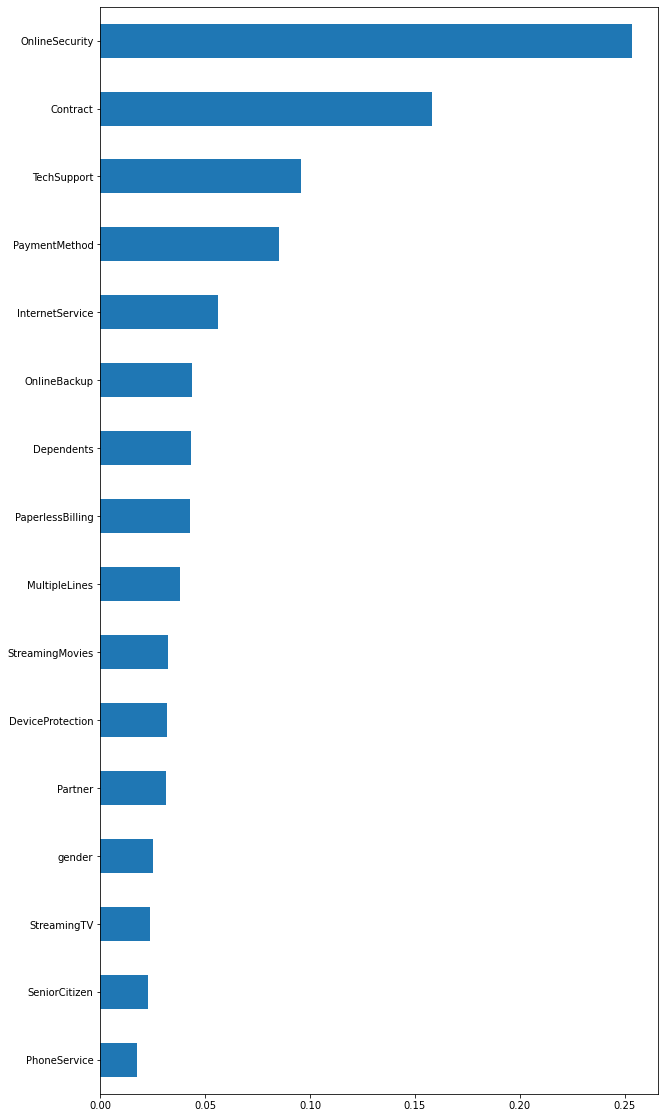

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
model_dt = pipe_dt.named_steps['decisiontreeclassifier']
importances = pd.Series(model_dt.feature_importances_, X_train.columns)
plt.figure(figsize=(10, 20))
importances.sort_values().plot.barh();

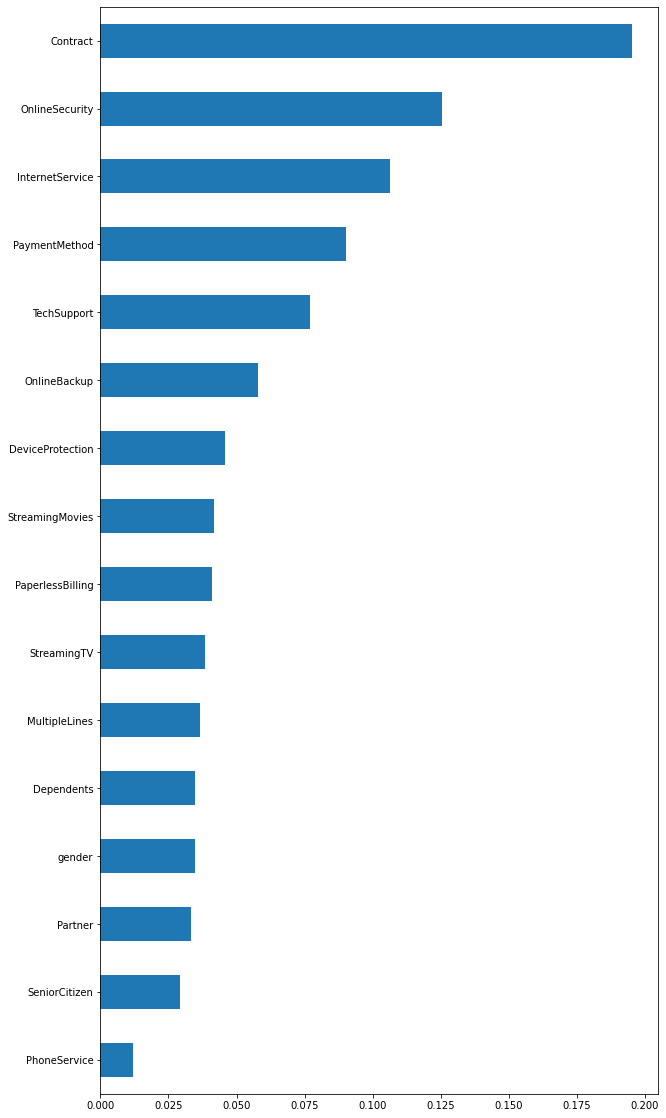

In [ ]:
model_rf = pipe_rf.named_steps['randomforestclassifier']
importances = pd.Series(model_rf.feature_importances_, X_train.columns)
plt.figure(figsize=(10, 20))
importances.sort_values().plot.barh();

### **Conclusion**
> 오늘 Topic을 수행한 결과를 바탕으로, 다음 사항에 대해 발표해 주세요.

1. Decision tree 및 Random forest의 성능은 기준모델과 비교하여 어떤가요? 
2. 트리 기반 모델의 학습 결과, 어떤 문제가 발생하였나요?
  - 해당 문제를 어떻게 해소할 수 있나요?
3. Decision tree와 Random forest의 Feature importance를 해석해 보세요. 
4. 트리 기반 모델과 선형 모델의 차이점을 설명해 보세요. 
5. (advanced) 트리 기반 모델에서 범주형 데이터에 One-Hot Encoder가 아닌 Ordinal Encoder를 사용한 이유는 무엇일까요? 
- **Discussion** 표의 `정리` 탭에 답변을 정리하여 적어 주세요. 

## **심화 Topic(optional)**
- 결정트리에서는 왜 명목형 변수에 OneHotEncoding을 적용하지 않고 모두 OrdinalEncoding으로 변환하여도 상관없는지 논의해보세요.
  - 트리 기반 모델에서 OneHotEncoding을 사용했을 때 생기는 문제점은 무엇일까요? 어떤 경우에, 왜 그런지 이유를 생각해보세요.
  - OrdinalEncoding을 사용하면 어떻게 위 문제를 해결할 수 있을까요? 
  - 순서형 변수의 범주의 순서가 바뀌면 결과가 달라질까요? 다음 코드를 실행한 후 결과를 확인하고 이유를 설명해보세요.
    - Encoder는 `OrdinalEncoder()`를 사용하세요.
    - 결측치는 `SimpleImputer()`를 사용하여 처리하세요. 

In [ ]:
#데이터 로딩 및 분리
target = 'vacc_h1n1_f'
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)

#편의상 4개의 변수만 사용합니다.
train = train[['behavioral_face_mask', 'behavioral_wash_hands', 'opinion_h1n1_vacc_effective', target]]

#데이터 분리
X_train, X_val, y_train, y_val = train_test_split(train.drop(target, axis = 1), train[target], test_size = 0.2, random_state = 42, stratify = train[target])
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
X_train.head()

(33723, 3) (8431, 3) (33723,) (8431,)


,behavioral_face_mask,behavioral_wash_hands,opinion_h1n1_vacc_effective
18446,NaN,NaN,NaN
2370,0.0,1.0,Somewhat Effective
1475,0.0,1.0,Somewhat Effective
10595,1.0,1.0,Somewhat Effective
29287,0.0,1.0,Somewhat Effective


In [ ]:
# 인코딩이 필요한 변수
X_train['opinion_h1n1_vacc_effective'].value_counts()

Somewhat Effective      11808
Very Effective           7190
Dont Know                4872
Not Very Effective       1836
Not At All Effective      876
Refused                   109
Name: opinion_h1n1_vacc_effective, dtype: int64

In [ ]:
# 먼저 맵핑을 지정하지 않고 Ordinal 인코딩을 사용했을 때 결과를 살펴보세요. 

In [ ]:
# 다음으로 아래와 같이 맵핑을 지정하고 Ordinal 인코딩을 사용했을 때 결과를 살펴보세요. 
# 공식문서의 mapping 파라미터를 참고하여 수행해 보세요. https://contrib.scikit-learn.org/category_encoders/ordinal.html
'''
mapping = {'Somewhat Effective' : 1, 'Very Effective': 2, 'Dont Know': 3,
'Not Very Effective': 4, 'Not At All Effective': 5, 'Refused': 6}
'''
# 맵핑을 지정하지 않았을 때의 결과와 성능을 비교해 보세요! 

"\nmapping = {'Somewhat Effective' : 1, 'Very Effective': 2, 'Dont Know': 3,\n'Not Very Effective': 4, 'Not At All Effective': 5, 'Refused': 6}\n"

# **N222 Boosting**

## 오늘의 목표
- XGBoost 라이브러리를 이용해 XGBoost 모델을 구현할 수 있습니다.
- 하이퍼파라미터 튜닝을 통해 과적합을 해소할 수 있습니다.
- early stopping에 대해 이해하고, 이를 적용하여 모델을 학습할 수 있습니다. 


## **개념 Topic**
> 오늘은 대표적 앙상블 기법인 부스팅(Boosting)에 대해 배웠습니다.

- 배깅과 부스팅의 차이를 한 문장으로 요약하여 설명해보세요.
    - 각각의 모델은 편향과 분산 중 어떤 에러를 줄이는 방향으로 학습하나요?
        - 어떻게 그 에러를 줄일 수 있나요?
    - 만약 설명이 어렵다면 어느 부분이 이해가 안 되는지 구체적인 질문을 동기들과 나눠보세요.
- **Discussion** 표의 `정리` 탭에 답변을 정리하여 적어 주세요. 

## **코딩 Topic**

### **Part.4 : 모델 학습 및 평가**
> **N221**의 **Part.1**에 이어 **Part.5** & **Part.6**를 진행합니다. 

#### **4-1. XGBoost**
- 파이프라인을 다음과 같이 구성하세요.
  - 데이터셋 변환에는 `OrdinalEncoder()`를 사용합니다.
  - 분류 모델은 `XGBClassifier()`를 사용합니다.
    - `random_state`를 설정하여 고정된 결과가 나오도록 해 보세요.
    - 분류 모델에 적합한 `objective`를 설정하세요.
    - `eval_metric=error`로 설정하세요. 
- 파이프라인을 사용하여 데이터셋 변환 및 모델 학습을 수행하세요.
- train/val set의 정확도를 각각 구하세요. 

#### **4-2. 과적합 해소**
- 과적합이 발생하지 않도록 `max_depth`와 `learning_rate`을 조정해 보세요. 
  - `max_depth` 값을 고정한 상태에서 `learning_rate`를 얼마로 설정했을 때 가장 성능이 좋은지 최적의 값을 찾아보세요.

#### **4-3. early stopping**
> 이번에는 early stopping을 적용하여 학습해 보겠습니다.

- `OrdinalEncoder()`를 사용하여 데이터셋을 변환하세요.
- `XGBClassifier()` 모델을 생성하세요. 
  - `random_state`를 설정하여 고정된 결과가 나오도록 해 보세요.
  - `objective`, `eval_metric`은 **2-1**과 동일하게 설정하세요.  
  - `max_depth`, `learning_rate`은 **2-2**에서 구한 최적의 값으로 설정하세요. 
  - `n_estimators`를 충분히 크게 설정해 보세요. 
- early stopping을 적용하여 모델을 학습시키세요.
  - `eval_set`은 위에서 인코딩한 train/val set으로 설정하세요.
  - 50 rounds 동안 성능이 향상되지 않으면 학습을 멈추도록 설정하세요. 

#### **4-4. 최종 모델**
- **4-1 ~ 4-3**에서 만든 모델 중 가장 성능이 좋다고 판단되는 모델을 선택하여 test set에 대한 일반화 성능을 확인해 보세요.

### **Part.5 모델 해석**

#### **5-1. Feature Importance**
- XGBoost의 feature importance를 해석해 보세요. 
  - **4-3**에서 early stopping을 적용했던 모델을 사용합니다. 
  - **n221**에서 나타낸 random forest의 feature importance와 비교해 보세요.


### **Conclusion**
> 오늘 Topic을 수행한 결과를 바탕으로, 다음 사항에 대해 발표해 주세요.

1. Decision tree 및 Random forest와 마찬가지로 XGBoost에서도 과적합이 발생했나요?
  - 과적합을 어떻게 해소하였나요? 
2. XGBoost 라이브러리에서 제공하는 early stopping을 적용해 보았는데, early stopping은 어떤 역할을 수행하는 기능인가요? 
3. Decision tree / Random forest / XGBoost의 성능을 비교해 보세요.
4. Random forest와 Xgboost의 Feature importance를 비교해 보세요. 
- **Discussion** 표의 `정리` 탭에 답변을 정리하여 적어 주세요. 

## **심화 Topic(optional)**
- Learning rate를 조정하는 것은 어떤 의미가 있을까요? 다음 코드를 사용하여 결과를 확인해 보세요.
  - Learning rate 값에 따라 모델의 성능은 어떻게 변하나요? 
  - Learning rate는 어떤 역할을 하는 하이퍼파라미터인가요?

In [ ]:
# 타겟을 정합니다.
target = "vacc_h1n1_f"

# 학습데이터 features, labels 를 병합합니다.
train = pd.merge(
    pd.read_csv(
        "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv"
    ),
    pd.read_csv(
        "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv"
    )[target],
    left_index=True,
    right_index=True,
)
test = pd.read_csv(
    "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv"
)

# 80/20 비율로 학습/테스트 데이터를 분리합니다.
train, val = train_test_split(
    train, train_size=0.80, test_size=0.20, stratify=train[target], random_state=2
)

X_train, y_train = train.drop(columns=target), train[target]
X_val, y_val = val.drop(columns=target), val[target]
X_test = test

In [ ]:
# 학습률 변화에 따른 결과 함수
def change_lr(lr):
  pipe = make_pipeline(
      OrdinalEncoder(),
      XGBClassifier(
          objective="binary:logistic",
          eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
          n_estimators=100,
          random_state=42,
          n_jobs=-1,
          max_depth=7,
          learning_rate=lr,
      ),
  )

  pipe.fit(X_train, y_train)
  print(f'학습률이 {lr}일 때')
  print('학습 정확도: ', pipe.score(X_train, y_train))
  print('검증 정확도: ', pipe.score(X_val, y_val))
  print('')

In [ ]:
# for문을 사용해서 학습률 변화에 따라 결과가 어떻게 바뀌는지 확인해보세요!
lr_list = [0.1, 0.3, 0.5, 0.7, 1]